## OM NAMAH SHIVAAY

In [93]:
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import seaborn as sn
import numpy as np
import random
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
%matplotlib inline
configuration = tf.compat.v1.ConfigProto()
configuration.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=configuration)

In [94]:
(X_train,Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()

In [95]:
X_train = X_train/255
X_test = X_test/255

In [96]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape = (784,),activation='sigmoid')
])
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(X_train_flattened,Y_train,epochs = 10)

In [6]:
model.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 2s 3ms/step - loss: 0.2650 - accuracy: 0.9273


[0.26499199867248535, 0.927299976348877]

In [7]:
Y_predicted = model.predict(X_test_flattened)
Y_predicted_labels = [np.argmax(o) for o in Y_predicted]

In [8]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=Y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    0,    2,    0,    4,    8,    3,    2,    0],
       [   0, 1107,    4,    2,    0,    1,    4,    2,   15,    0],
       [   6,    8,  928,   16,    6,    3,   13,   10,   37,    5],
       [   3,    0,   18,  925,    0,   17,    3,   12,   23,    9],
       [   1,    1,    3,    2,  908,    0,   12,    5,   10,   40],
       [  10,    2,    2,   43,    9,  761,   17,    9,   32,    7],
       [  11,    3,    6,    1,    7,    7,  920,    1,    2,    0],
       [   2,    6,   23,    3,    4,    1,    0,  955,    2,   32],
       [   8,    6,    5,   22,    9,   16,   10,   10,  878,   10],
       [  11,    7,    1,    9,   19,    4,    0,   21,    7,  930]])>

<AxesSubplot:>

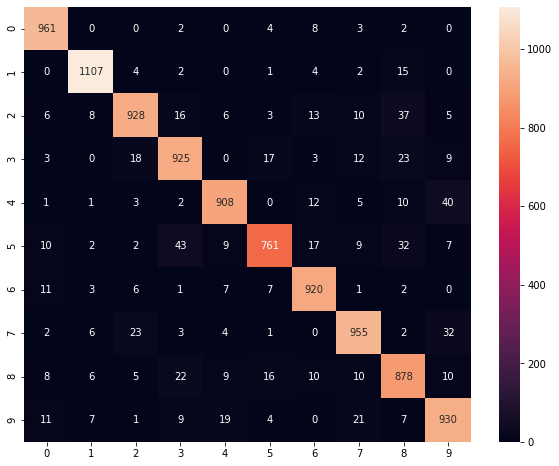

In [9]:
plt.figure(figsize = (10,8))
sn.heatmap(cm,annot=True,fmt = 'd')

In [10]:
model = keras.Sequential([
    keras.layers.Dense(205,input_shape = (784,),activation='relu'),
    keras.layers.Dense(10,input_shape = (784,),activation='sigmoid')
])
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy'
              ,metrics = ['accuracy'])
model.fit(X_train_flattened,Y_train,epochs = 5, callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3952 - accuracy: 0.8856
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1056 - accuracy: 0.9692
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0642 - accuracy: 0.9810
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0453 - accuracy: 0.9863
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0343 - accuracy: 0.9890


In [11]:
%load_ext tensorboard
%tensorboard --logdir logs/

Reusing TensorBoard on port 6006 (pid 20204), started 3 days, 21:51:10 ago. (Use '!kill 20204' to kill it.)

In [12]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0640 - accuracy: 0.9797


[0.06399272382259369, 0.9797000288963318]

<AxesSubplot:>

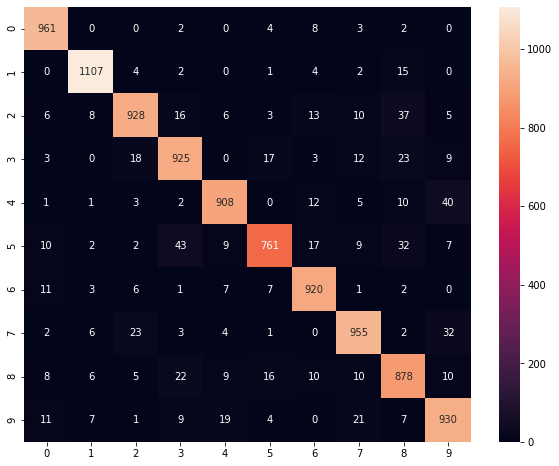

In [13]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=Y_predicted_labels)
plt.figure(figsize = (10,8))
sn.heatmap(cm,annot=True,fmt = 'd')

## losses and alll

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(205,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
prob = []
optimizers = ['SGD','RMSprop','Adam','Adadelta','Adagrad','Adamax','Nadam','Ftrl']
loss = ['sparse_categorical_crossentropy','poisson','kl_divergence']
for i in optimizers:
    for j in loss:
        model.compile(optimizer= i,
              loss = j
              ,metrics = ['accuracy'])
        model.fit(X_train_flattened,Y_train,epochs = 2)
        prob.append([i,j,model.evaluate(X_test_flattened,Y_test)])

Epoch 1/2
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9909 - accuracy: 0.7437
Epoch 2/2
313/313 [==============================] - 1s 2ms/step - loss: 0.2845 - accuracy: 0.9211
Epoch 1/2
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2087 - accuracy: 0.8529
Epoch 2/2
313/313 [==============================] - 1s 2ms/step - loss: 1.0012 - accuracy: 0.7596
Epoch 1/2
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0067 - accuracy: 0.7099
Epoch 2/2
313/313 [==============================] - 1s 2ms/step - loss: 0.0012 - accuracy: 0.5235
Epoch 1/2
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2510 - accuracy: 0.9269
Epoch 2/2
313/313 [==============================] - 1s 3ms/step - loss: 0.0967 - accuracy: 0.9727
Epoch 1/2
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1195 - accuracy: 0.3032
Epoch 2/2
313/313 [==============================] - 1s 2ms/step - loss: 0.9247 - accuracy: 0.1001


In [15]:
for i in range(8):
    j = 3*i
    print(prob[j:j+3])

[['SGD', 'sparse_categorical_crossentropy', [0.28445032238960266, 0.9211000204086304]], ['SGD', 'poisson', [1.0011990070343018, 0.7595999836921692]], ['SGD', 'kl_divergence', [0.0012487254571169615, 0.5235000252723694]]]
[['RMSprop', 'sparse_categorical_crossentropy', [0.0966646671295166, 0.9726999998092651]], ['RMSprop', 'poisson', [0.9247262477874756, 0.10010000318288803]], ['RMSprop', 'kl_divergence', [-1.574672182869108e-06, 0.09809999912977219]]]
[['Adam', 'sparse_categorical_crossentropy', [0.09858911484479904, 0.9714000225067139]], ['Adam', 'poisson', [0.9236087203025818, 0.10239999741315842]], ['Adam', 'kl_divergence', [-1.5091817431311938e-06, 0.09790000319480896]]]
[['Adadelta', 'sparse_categorical_crossentropy', [0.8301374316215515, 0.7251999974250793]], ['Adadelta', 'poisson', [0.9992726445198059, 0.09790000319480896]], ['Adadelta', 'kl_divergence', [-1.3984300721858745e-06, 0.09790000319480896]]]
[['Adagrad', 'sparse_categorical_crossentropy', [0.1455739289522171, 0.959999

## Matrix

In [16]:
revenue = np.array([[200,220,250],[68,79,105],[110,140,180],[80,85,90]])
revenue*75

array([[15000, 16500, 18750],
       [ 5100,  5925,  7875],
       [ 8250, 10500, 13500],
       [ 6000,  6375,  6750]])

In [17]:
unit = np.array([[3,-2,5],[0,-1,6],[-4,2,-1]])
ppu = np.array([[2,-1,0],[3,-5,2],[1,4,-2]])
ppu@unit

array([[  6,  -3,   4],
       [  1,   3, -17],
       [ 11, -10,  31]])

## Mean Squared Error

In [18]:
def wnp(y,y_bar):
    MSE = 0
    for i in range(len(y)):
        MSE += (y[i] - y_bar[i])**2
    print ("The Mean Square Error is: " , MSE/len(y))
    return

In [19]:
y_predicted = np.array([1,1,0,0,1])
y_true = np.array([0.30,0.7,1,0,0.5])
wnp(y_true,y_predicted)

The Mean Square Error is:  0.366


In [20]:
np.mean(np.square(y_true-y_predicted))

0.366

## Batch Gradient & Stochastic Gradient & Mini Batch Gradient

In [21]:
df = pd.read_csv('canada.csv')
df["feature"] = df['per capita income (US$)']/np.mean(df['per capita income (US$)'])
df

,year,per capita income (US$),feature
0,1970,3399.299037,0.179666
1,1971,3768.297935,0.199169
2,1972,4251.175484,0.224691
3,1973,4804.463248,0.253934
4,1974,5576.514583,0.294740
5,1975,5998.144346,0.317024
6,1976,7062.131392,0.373260
7,1977,7100.126170,0.375268
8,1978,7247.967035,0.383082
9,1979,7602.912681,0.401842


In [22]:
sx = MinMaxScaler()
sy = MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('per capita income (US$)',axis = 1))
print(scaled_X)

[[0.         0.        ]
 [0.02173913 0.00939474]
 [0.04347826 0.02168885]
 [0.06521739 0.0357756 ]
 [0.08695652 0.05543209]
 [0.10869565 0.06616682]
 [0.13043478 0.09325602]
 [0.15217391 0.09422337]
 [0.17391304 0.09798741]
 [0.19565217 0.10702435]
 [0.2173913  0.12619721]
 [0.23913043 0.15365393]
 [0.26086957 0.15836527]
 [0.2826087  0.17865945]
 [0.30434783 0.18817623]
 [0.32608696 0.1939971 ]
 [0.34782609 0.20580894]
 [0.36956522 0.24379322]
 [0.39130435 0.29739884]
 [0.41304348 0.33167936]
 [0.43478261 0.34216758]
 [0.45652174 0.35304985]
 [0.47826087 0.33130656]
 [0.5        0.31764732]
 [0.52173913 0.31459806]
 [0.54347826 0.33021774]
 [0.56521739 0.33863254]
 [0.58695652 0.3541869 ]
 [0.60869565 0.33666817]
 [0.63043478 0.3610679 ]
 [0.65217391 0.3968739 ]
 [0.67391304 0.38704669]
 [0.69565217 0.40310635]
 [0.7173913  0.49240125]
 [0.73913043 0.56826519]
 [0.76086957 0.65683849]
 [0.7826087  0.74697246]
 [0.80434783 0.83369506]
 [0.82608696 0.86684422]
 [0.84782609 0.74740309]


In [23]:
scaled_Y = sy.fit_transform(df.drop(['year','feature'],axis = 1))
print(scaled_Y)

[[0.        ]
 [0.00939474]
 [0.02168885]
 [0.0357756 ]
 [0.05543209]
 [0.06616682]
 [0.09325602]
 [0.09422337]
 [0.09798741]
 [0.10702435]
 [0.12619721]
 [0.15365393]
 [0.15836527]
 [0.17865945]
 [0.18817623]
 [0.1939971 ]
 [0.20580894]
 [0.24379322]
 [0.29739884]
 [0.33167936]
 [0.34216758]
 [0.35304985]
 [0.33130656]
 [0.31764732]
 [0.31459806]
 [0.33021774]
 [0.33863254]
 [0.3541869 ]
 [0.33666817]
 [0.3610679 ]
 [0.3968739 ]
 [0.38704669]
 [0.40310635]
 [0.49240125]
 [0.56826519]
 [0.65683849]
 [0.74697246]
 [0.83369506]
 [0.86684422]
 [0.74740309]
 [0.89164327]
 [0.99129883]
 [0.99971453]
 [1.        ]
 [0.95833267]
 [0.8090168 ]
 [0.78493168]]


In [24]:
scaled_Y.reshape(47,) 

array([0.        , 0.00939474, 0.02168885, 0.0357756 , 0.05543209,
       0.06616682, 0.09325602, 0.09422337, 0.09798741, 0.10702435,
       0.12619721, 0.15365393, 0.15836527, 0.17865945, 0.18817623,
       0.1939971 , 0.20580894, 0.24379322, 0.29739884, 0.33167936,
       0.34216758, 0.35304985, 0.33130656, 0.31764732, 0.31459806,
       0.33021774, 0.33863254, 0.3541869 , 0.33666817, 0.3610679 ,
       0.3968739 , 0.38704669, 0.40310635, 0.49240125, 0.56826519,
       0.65683849, 0.74697246, 0.83369506, 0.86684422, 0.74740309,
       0.89164327, 0.99129883, 0.99971453, 1.        , 0.95833267,
       0.8090168 , 0.78493168])

In [25]:
def mini_batch_gradient_descent(X,y_true,epochs,learning_rate = 0.01,batch_size = 9):
    nof = X.shape[1]
    w = np.ones(shape=nof)
    b=0
    total_samples = X.shape[0]
    cost_list = []
    epoch_list = []
    for i in range(epochs):
        rand = np.random.permutation(total_samples)
        XT = X[rand]
        YT = y_true[rand]
        
        for j in range(0,total_samples,batch_size):
            Xj = XT[j:j+batch_size]
            Yj = YT[j:j+batch_size]
            y_pred = np.dot(w,Xj.T) + b
            w_grad = -(2/len(Xj))*(Xj.T.dot(Yj-y_pred))
            b_grad = -(2/len(Xj))*np.sum(Yj-y_pred)
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
            cost = np.mean(np.square(Yj-y_pred))
             
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    scaled_X,
    scaled_Y.reshape(scaled_Y.shape[0],),
    epochs = 120,
    batch_size = 9
)
w, b, cost   

(array([0.52736956, 0.59319595]), -0.11055637588484477, 0.005623522388774142)

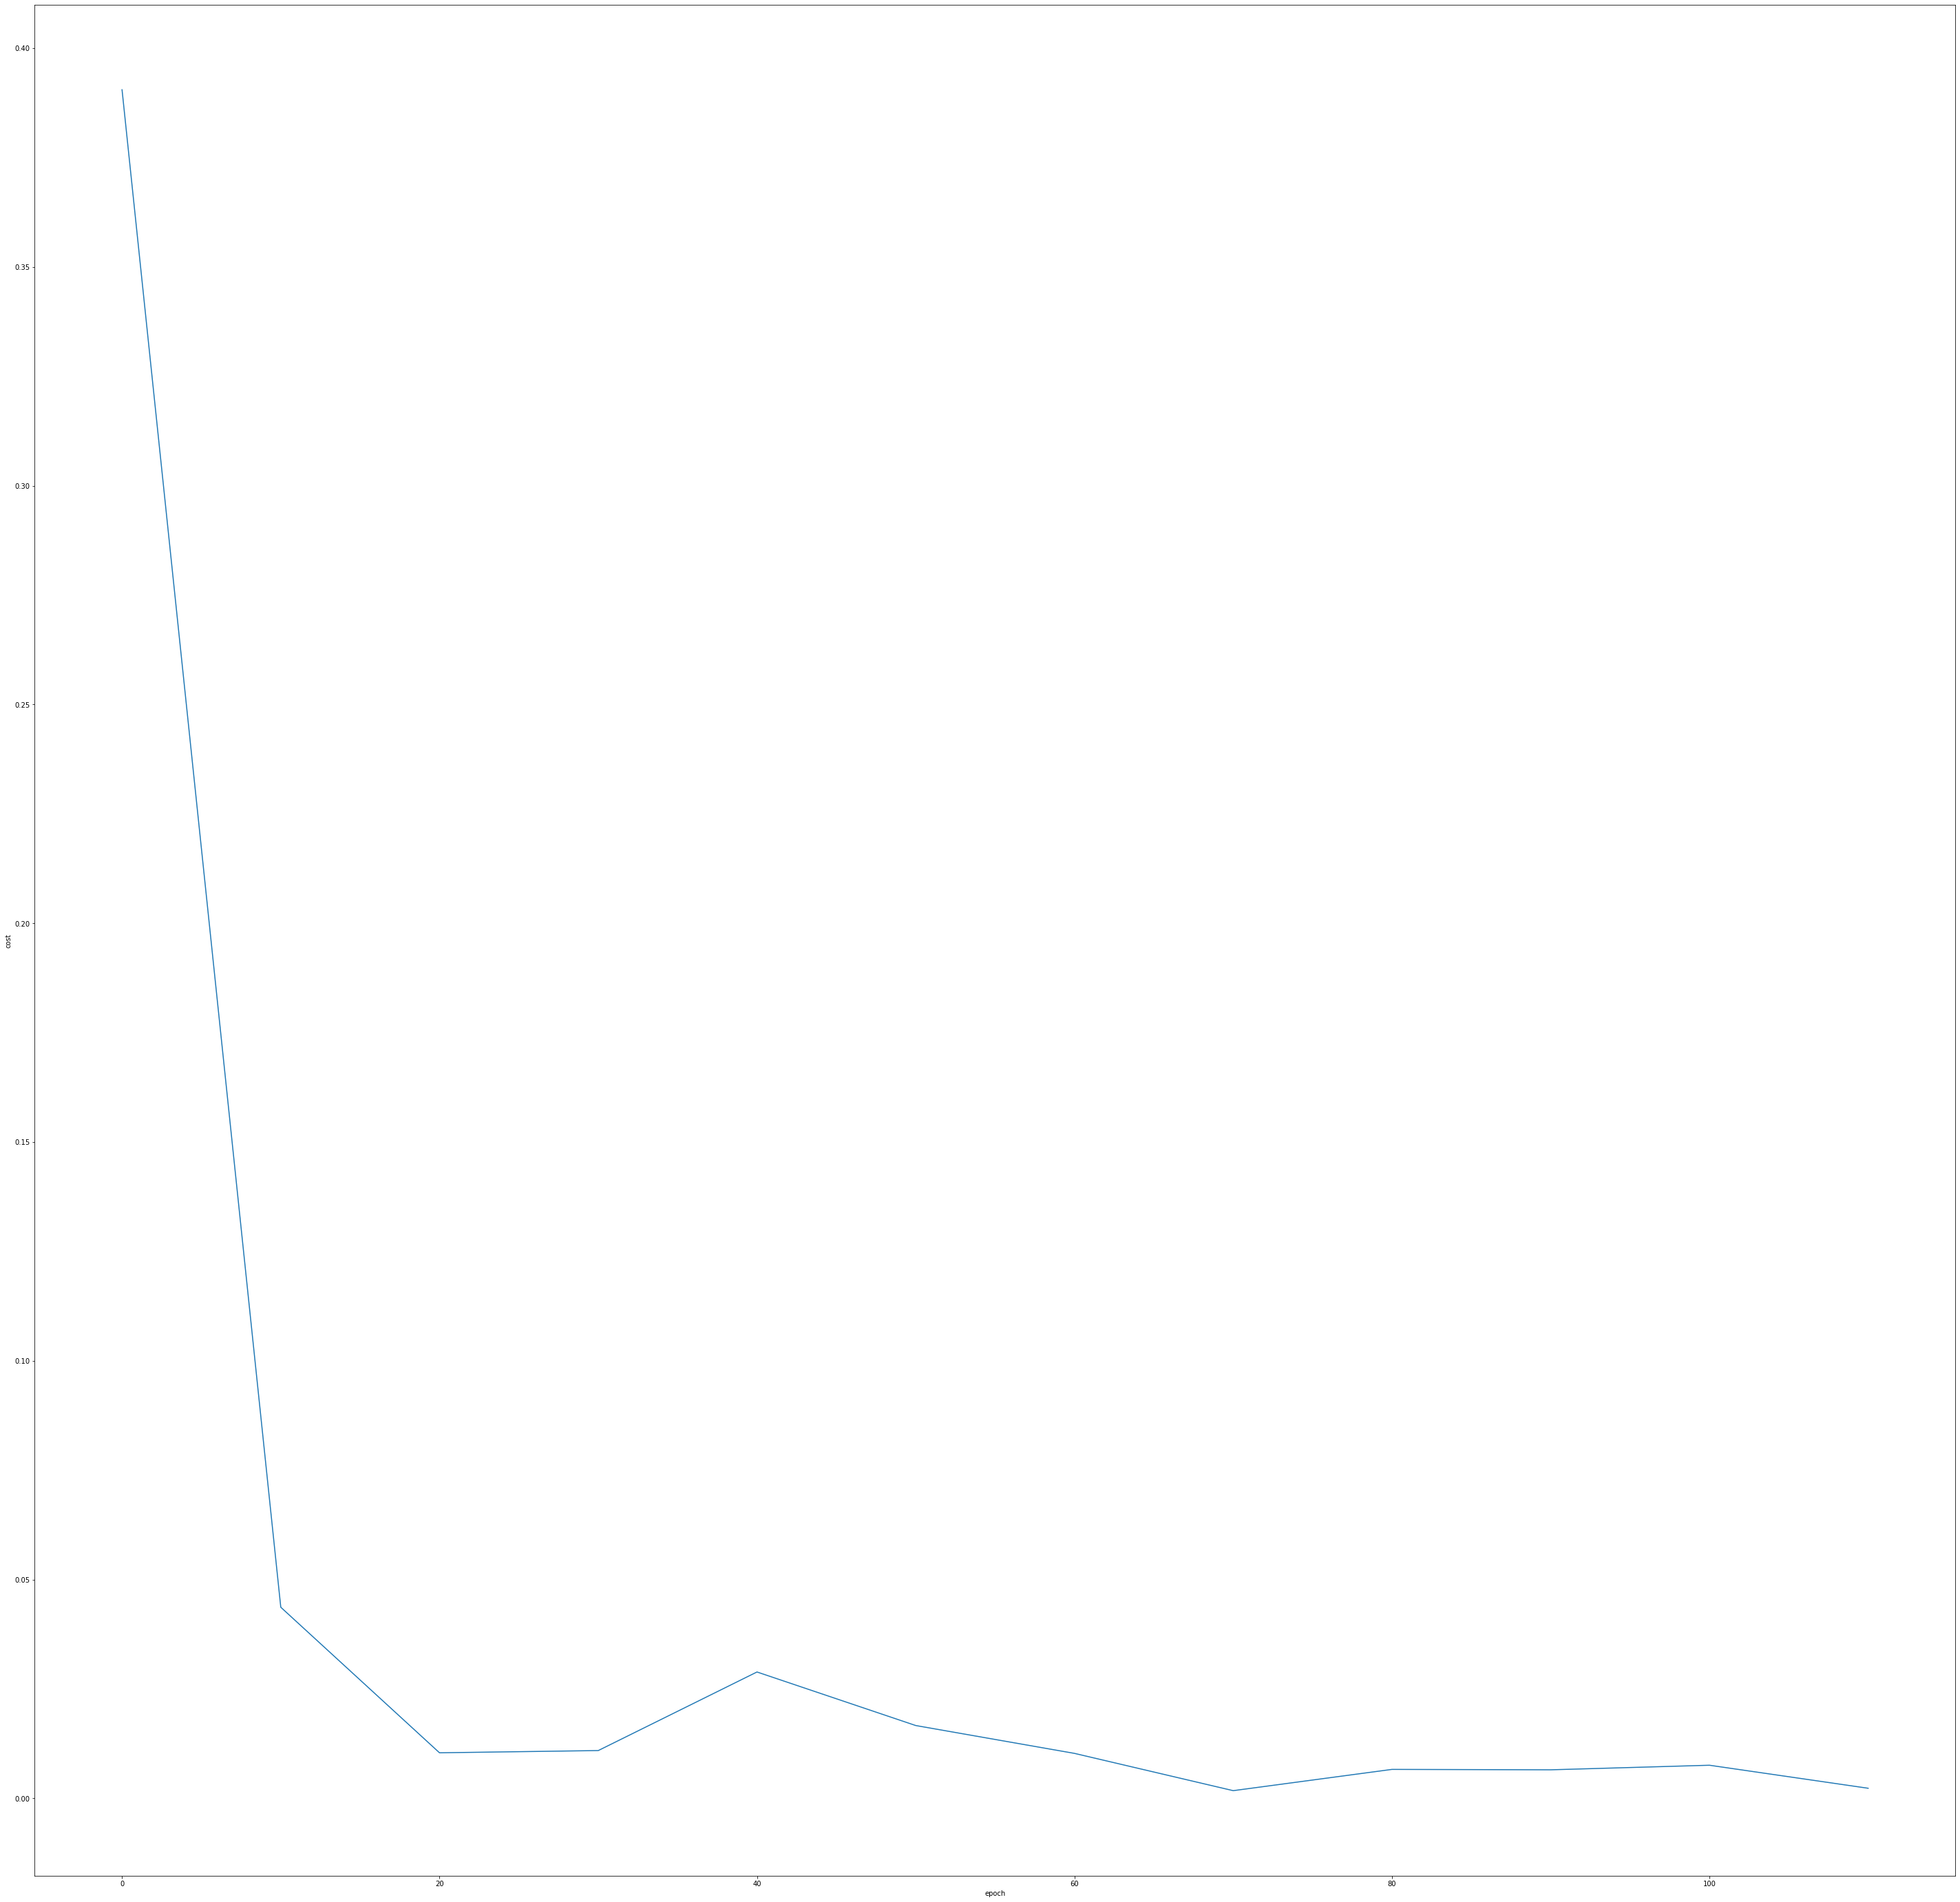

In [26]:
plt.figure(figsize = (50,50))
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [27]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]

In [28]:
predict(2002,0.088968,w,b)

12448.47544174571

## GPU Benchmarking

In [29]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [30]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [31]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images.shape

(60000, 28, 28)

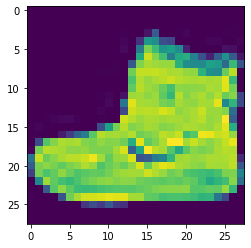

In [32]:
plt.imshow(train_images[0])

In [33]:
train_labels[0]

9

In [34]:
class_names[train_labels[0]]

'Ankle boot'

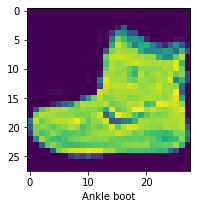

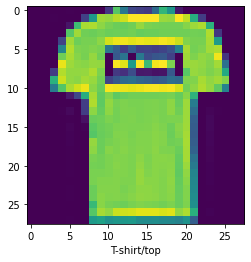

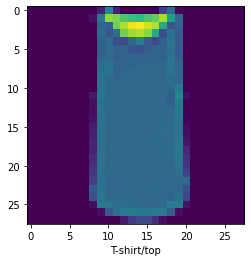

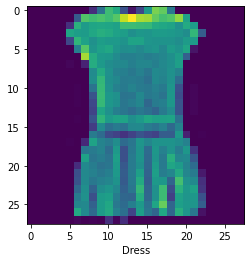

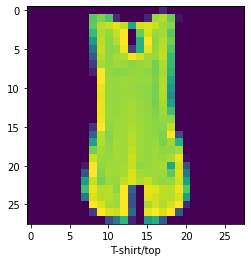

In [35]:
plt.figure(figsize=(3,3))
for i in range(5):
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
    plt.show()

In [36]:
train_images_scaled = train_images / 255.0
test_images_scaled = test_images / 255.0

In [37]:
def get_model(hidden_layers=1):
    # Flatten layer for input
    layers = [keras.layers.Flatten(input_shape=(28, 28))]
    # hideen layers
    for i in range(hidden_layers):
        layers.append(keras.layers.Dense(500, activation='relu'),)
    # output layer    
    layers.append(keras.layers.Dense(10, activation='sigmoid'))

    model = keras.Sequential(layers)
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [38]:
model = get_model(1)
model.fit(train_images_scaled,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5907 - accuracy: 0.7914
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3646 - accuracy: 0.8656
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3195 - accuracy: 0.8817
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2980 - accuracy: 0.8890
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2819 - accuracy: 0.8946


In [39]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    model = get_model(1)
    model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5816 - accuracy: 0.7943
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3677 - accuracy: 0.8653
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3271 - accuracy: 0.8796
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2971 - accuracy: 0.8882
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2817 - accuracy: 0.8948
33 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [40]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    model = get_model(1)
    model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5865 - accuracy: 0.7913
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3671 - accuracy: 0.8663
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3275 - accuracy: 0.8785
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3022 - accuracy: 0.8894
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2761 - accuracy: 0.8987
27.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [41]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    model = get_model(5)
    model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.6446 - accuracy: 0.7663
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4037 - accuracy: 0.8548
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3556 - accuracy: 0.8692
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3308 - accuracy: 0.8804
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3088 - accuracy: 0.8868
1min 20s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [42]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    model = get_model(5)
    model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6351 - accuracy: 0.7714
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4043 - accuracy: 0.8546
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3606 - accuracy: 0.8701
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3229 - accuracy: 0.8821
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3095 - accuracy: 0.8864
39.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [43]:
model = get_model(1)
model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5831 - accuracy: 0.7947
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3660 - accuracy: 0.8671
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3246 - accuracy: 0.8822
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3012 - accuracy: 0.8879
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2814 - accuracy: 0.8968


In [44]:
model = get_model(5)
model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6354 - accuracy: 0.7696
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3957 - accuracy: 0.8588
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3521 - accuracy: 0.8728
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3296 - accuracy: 0.8818
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3051 - accuracy: 0.8887


In [45]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    model = get_model(10)
    model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.8498 - accuracy: 0.6668
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.5123 - accuracy: 0.8191
Epoch 3/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4584 - accuracy: 0.8416
Epoch 4/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4376 - accuracy: 0.8497
Epoch 5/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3934 - accuracy: 0.8646
1min 53s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [46]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    model = get_model(10)
    model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.8631 - accuracy: 0.6587
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.5135 - accuracy: 0.8223
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4350 - accuracy: 0.8523
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4199 - accuracy: 0.8516
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3845 - accuracy: 0.8661
1min 7s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## ANN

In [47]:
df = pd.read_csv('Churn_Modelling.csv')
print(df.shape)
df.sample(5)

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
77,78,15662085,Read,678,France,Female,32,9,0.00,1,1,1,148210.64,0
4953,4954,15684516,Plascencia,629,Spain,Male,34,1,121151.05,1,0,0,119357.93,0
5081,5082,15757537,Francis,610,France,Female,31,6,107784.65,1,1,1,141137.53,0
5529,5530,15812647,Yin,691,France,Male,34,8,133936.04,2,1,0,91359.79,0
6793,6794,15611669,Nyhan,623,Germany,Male,50,7,126608.37,1,0,1,645.61,1


In [48]:
df1 = df.drop(['RowNumber','CustomerId','Surname'],axis = 1)
df1.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3688,679,Germany,Male,35,1,110245.13,1,1,1,178291.09,0
1586,735,France,Female,33,4,0.00,2,1,0,149474.69,0
1482,574,France,Male,26,8,97460.10,1,1,1,43093.67,0
6738,573,Germany,Male,35,9,134498.54,2,1,1,119924.80,0
6758,693,Spain,Male,28,1,145118.83,1,0,1,77742.38,0


In [49]:
df1.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [50]:
df2 = pd.get_dummies(data = df1,columns = ['Geography'])
df2['Gender'].replace({'Female':1,'Male':0},inplace=True)
df2.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
4051,793,1,63,9,116270.72,1,1,1,184243.25,0,1,0,0
8841,557,0,36,1,113110.26,1,1,0,98413.10,0,0,0,1
3644,593,1,32,3,0.00,2,1,1,151978.36,0,1,0,0
7156,632,0,65,6,129472.33,1,1,1,85179.48,0,0,1,0
550,721,1,36,3,65253.07,2,1,0,28737.78,0,0,1,0


In [51]:
scaler = MinMaxScaler()
df2[['Age','Balance','EstimatedSalary','CreditScore']] = scaler.fit_transform(df2[['Age','Balance','EstimatedSalary','CreditScore']])

In [52]:
df2.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
6543,0.928,0,0.148649,1,0.525985,2,1,1,0.738482,0,0,1,0
1693,0.408,1,0.216216,8,0.000000,1,0,1,0.534898,0,0,0,1
938,0.454,1,0.256757,4,0.000000,1,1,1,0.399387,0,1,0,0
5564,0.518,0,0.283784,2,0.555778,2,1,0,0.046117,0,0,0,1
1643,0.562,1,0.216216,4,0.495736,1,1,0,0.534458,0,1,0,0


In [53]:
df2.dtypes

CreditScore          float64
Gender                 int64
Age                  float64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [54]:
X = df2.drop('Exited',axis=1)
y = df2['Exited']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=2)

In [55]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9000, 12) (1000, 12) (9000,) (1000,)


In [56]:
model = keras.Sequential([
    keras.layers.Dense(12,input_shape=(12,),activation='relu'),
    keras.layers.Dense(2,input_shape=(12,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
282/282 [==============================] - 3s 6ms/step - loss: 0.5319 - accuracy: 0.7917
Epoch 2/50
282/282 [==============================] - 1s 4ms/step - loss: 0.4730 - accuracy: 0.7967
Epoch 3/50
282/282 [==============================] - 2s 6ms/step - loss: 0.4518 - accuracy: 0.7976
Epoch 4/50
282/282 [==============================] - 2s 5ms/step - loss: 0.4525 - accuracy: 0.7972
Epoch 5/50
282/282 [==============================] - 1s 5ms/step - loss: 0.4430 - accuracy: 0.7968
Epoch 6/50
282/282 [==============================] - 1s 5ms/step - loss: 0.4445 - accuracy: 0.7975
Epoch 7/50
282/282 [==============================] - 1s 5ms/step - loss: 0.4303 - accuracy: 0.7982
Epoch 8/50
282/282 [==============================] - 1s 5ms/step - loss: 0.4310 - accuracy: 0.7970
Epoch 9/50
282/282 [==============================] - 2s 5ms/step - loss: 0.4286 - accuracy: 0.8090
Epoch 10/50
282/282 [==============================] - 2s 5ms/step - loss: 0.4354 - accuracy: 0.8052

In [57]:
prediction = model.predict(X_test)
y_pred = []
for predicted in prediction:
    if predicted>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       812
           1       0.67      0.33      0.44       188

    accuracy                           0.84      1000
   macro avg       0.77      0.65      0.68      1000
weighted avg       0.83      0.84      0.82      1000



Text(69.0, 0.5, 'Truth')

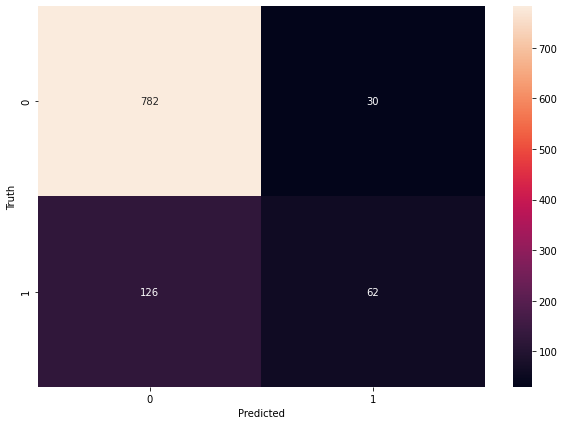

In [59]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [60]:
model = keras.Sequential([
    keras.layers.Dense(12,input_shape=(12,),activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2,input_shape=(12,),activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
282/282 [==============================] - 2s 4ms/step - loss: 0.7017 - accuracy: 0.7242
Epoch 2/50
282/282 [==============================] - 1s 3ms/step - loss: 0.5774 - accuracy: 0.7892
Epoch 3/50
282/282 [==============================] - 1s 4ms/step - loss: 0.5422 - accuracy: 0.7927
Epoch 4/50
282/282 [==============================] - 1s 4ms/step - loss: 0.5276 - accuracy: 0.7935
Epoch 5/50
282/282 [==============================] - 1s 4ms/step - loss: 0.5177 - accuracy: 0.7929
Epoch 6/50
282/282 [==============================] - 1s 5ms/step - loss: 0.5067 - accuracy: 0.7968
Epoch 7/50
282/282 [==============================] - 1s 4ms/step - loss: 0.5019 - accuracy: 0.7963
Epoch 8/50
282/282 [==============================] - 1s 4ms/step - loss: 0.5046 - accuracy: 0.7946
Epoch 9/50
282/282 [==============================] - 1s 4ms/step - loss: 0.5060 - accuracy: 0.7897
Epoch 10/50
282/282 [==============================] - 1s 4ms/step - loss: 0.4975 - accuracy: 0.7978

In [61]:
def ANN(X_train,X_test,y_train,y_test,epochs = 50):
    model = keras.Sequential([
        keras.layers.Dense(12,input_shape=(12,),activation='relu'),
        keras.layers.Dense(2,input_shape=(12,),activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    model.fit(X_train,y_train,epochs=epochs)
    
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred)
    
    print(classification_report(y_test,y_pred))
    
    return y_pred

## undersample

In [62]:
df2[df2['Exited']==1].shape

(2037, 13)

In [63]:
df2[df2['Exited']==0].shape

(7963, 13)

In [64]:
df2_under_zero = df2[df2['Exited']==0].sample(2037)
df2_under_zero.shape

(2037, 13)

In [65]:
df_under = pd.concat([df2_under_zero,df2[df2['Exited']==1]],axis=0)
df_under.shape

(4074, 13)

In [66]:
X = df_under.drop('Exited',axis=1)
y = df_under['Exited']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=10,stratify=y)

In [67]:
y_pred = ANN(X_train, X_test, y_train, y_test)

Epoch 1/50
115/115 [==============================] - 4s 3ms/step - loss: 0.9605 - accuracy: 0.4903
Epoch 2/50
115/115 [==============================] - 0s 3ms/step - loss: 0.6960 - accuracy: 0.5125
Epoch 3/50
115/115 [==============================] - 0s 3ms/step - loss: 0.6829 - accuracy: 0.5624
Epoch 4/50
115/115 [==============================] - 0s 4ms/step - loss: 0.6713 - accuracy: 0.5857
Epoch 5/50
115/115 [==============================] - 0s 3ms/step - loss: 0.6634 - accuracy: 0.6157
Epoch 6/50
115/115 [==============================] - 0s 4ms/step - loss: 0.6561 - accuracy: 0.6259
Epoch 7/50
115/115 [==============================] - 0s 3ms/step - loss: 0.6528 - accuracy: 0.6334
Epoch 8/50
115/115 [==============================] - 0s 3ms/step - loss: 0.6384 - accuracy: 0.6600
Epoch 9/50
115/115 [==============================] - 0s 3ms/step - loss: 0.6368 - accuracy: 0.6549
Epoch 10/50
115/115 [==============================] - 0s 3ms/step - loss: 0.6303 - accuracy: 0.6717

## Oversample

In [68]:
df2_over_one = df2[df2['Exited']==1].sample(7963,replace=True)
df2_over_one.shape

(7963, 13)

In [69]:
df_over = pd.concat([df2[df2['Exited']==0],df2_over_one],axis=0)
df_over.shape

(15926, 13)

In [70]:
X = df_over.drop('Exited',axis=1)
y = df_over['Exited']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=10,stratify=y)
y_pred = ANN(X_train, X_test, y_train, y_test)

Epoch 1/50
448/448 [==============================] - 3s 5ms/step - loss: 0.6796 - accuracy: 0.5861
Epoch 2/50
448/448 [==============================] - 2s 5ms/step - loss: 0.6469 - accuracy: 0.6484
Epoch 3/50
448/448 [==============================] - 2s 5ms/step - loss: 0.6211 - accuracy: 0.6762
Epoch 4/50
448/448 [==============================] - 2s 4ms/step - loss: 0.5887 - accuracy: 0.6916
Epoch 5/50
448/448 [==============================] - 2s 4ms/step - loss: 0.5555 - accuracy: 0.7262
Epoch 6/50
448/448 [==============================] - 2s 5ms/step - loss: 0.5460 - accuracy: 0.7289
Epoch 7/50
448/448 [==============================] - 3s 6ms/step - loss: 0.5305 - accuracy: 0.7400
Epoch 8/50
448/448 [==============================] - 3s 6ms/step - loss: 0.5218 - accuracy: 0.7506
Epoch 9/50
448/448 [==============================] - 2s 5ms/step - loss: 0.5179 - accuracy: 0.7482
Epoch 10/50
448/448 [==============================] - 2s 5ms/step - loss: 0.5204 - accuracy: 0.7434

## SMOTE Oversample

In [71]:
X = df2.drop('Exited',axis=1)
y = df2['Exited']
sm = SMOTE(sampling_strategy='minority')
X_sm,y_sm = sm.fit_resample(X,y)
y_sm.value_counts()

0    7963
1    7963
Name: Exited, dtype: int64

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.1,random_state=2,stratify=y_sm)

In [73]:
y_pred = ANN(X_train, X_test, y_train, y_test)

Epoch 1/50
448/448 [==============================] - 3s 5ms/step - loss: 0.7640 - accuracy: 0.5393
Epoch 2/50
448/448 [==============================] - 2s 5ms/step - loss: 0.6448 - accuracy: 0.6481
Epoch 3/50
448/448 [==============================] - 2s 5ms/step - loss: 0.6024 - accuracy: 0.6871
Epoch 4/50
448/448 [==============================] - 2s 5ms/step - loss: 0.5810 - accuracy: 0.7040
Epoch 5/50
448/448 [==============================] - 2s 5ms/step - loss: 0.5573 - accuracy: 0.7204
Epoch 6/50
448/448 [==============================] - 2s 4ms/step - loss: 0.5424 - accuracy: 0.7264
Epoch 7/50
448/448 [==============================] - 2s 4ms/step - loss: 0.5312 - accuracy: 0.7387
Epoch 8/50
448/448 [==============================] - 2s 4ms/step - loss: 0.5228 - accuracy: 0.7484
Epoch 9/50
448/448 [==============================] - 2s 4ms/step - loss: 0.5116 - accuracy: 0.7592
Epoch 10/50
448/448 [==============================] - 2s 4ms/step - loss: 0.5050 - accuracy: 0.7641

## Ensemble Under sample

In [74]:
df_ens_zero = df2[df2['Exited']==0] 
df_ens_one = df2[df2['Exited']==1]
print(df_ens_one.shape,df_ens_zero.shape)

(2037, 13) (7963, 13)


In [75]:
df_ens_zero = df_ens_zero.sample(8148,replace=True)
df_ens_zero.shape

(8148, 13)

In [76]:
def Ensembling(src,to,majority,minority):
    df = pd.concat([majority[src:to],minority],axis=0)
    print(df.shape)
    return df

In [77]:
Run1 = Ensembling(0,2037,df_ens_zero,df_ens_one)
X = Run1.drop(['Exited'],axis = 1)
y = Run1['Exited']

(4074, 13)


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=2,stratify=y)

In [79]:
r1 = ANN(X_train, X_test, y_train, y_test)

Epoch 1/50
115/115 [==============================] - 1s 3ms/step - loss: 0.6857 - accuracy: 0.5329
Epoch 2/50
115/115 [==============================] - 0s 3ms/step - loss: 0.6568 - accuracy: 0.6324
Epoch 3/50
115/115 [==============================] - 0s 3ms/step - loss: 0.6359 - accuracy: 0.6583
Epoch 4/50
115/115 [==============================] - 0s 4ms/step - loss: 0.6273 - accuracy: 0.6667
Epoch 5/50
115/115 [==============================] - 0s 4ms/step - loss: 0.6135 - accuracy: 0.6820
Epoch 6/50
115/115 [==============================] - 0s 4ms/step - loss: 0.6120 - accuracy: 0.6702
Epoch 7/50
115/115 [==============================] - 1s 4ms/step - loss: 0.6035 - accuracy: 0.6905
Epoch 8/50
115/115 [==============================] - 1s 5ms/step - loss: 0.5988 - accuracy: 0.6884
Epoch 9/50
115/115 [==============================] - 0s 4ms/step - loss: 0.5896 - accuracy: 0.6903
Epoch 10/50
115/115 [==============================] - 0s 4ms/step - loss: 0.5836 - accuracy: 0.6896

In [80]:
Run2 = Ensembling(2037,4074,df_ens_zero,df_ens_one)
X = Run2.drop(['Exited'],axis = 1)
y = Run2['Exited']

(4074, 13)


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=2,stratify=y)

In [82]:
r2 = ANN(X_train, X_test, y_train, y_test,50)

Epoch 1/50
115/115 [==============================] - 1s 4ms/step - loss: 0.7470 - accuracy: 0.5188
Epoch 2/50
115/115 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5113
Epoch 3/50
115/115 [==============================] - 0s 4ms/step - loss: 0.6847 - accuracy: 0.5609
Epoch 4/50
115/115 [==============================] - 0s 4ms/step - loss: 0.6710 - accuracy: 0.6167
Epoch 5/50
115/115 [==============================] - 0s 4ms/step - loss: 0.6669 - accuracy: 0.6165
Epoch 6/50
115/115 [==============================] - 0s 4ms/step - loss: 0.6630 - accuracy: 0.6212
Epoch 7/50
115/115 [==============================] - 0s 4ms/step - loss: 0.6556 - accuracy: 0.6325
Epoch 8/50
115/115 [==============================] - 0s 4ms/step - loss: 0.6498 - accuracy: 0.6384
Epoch 9/50
115/115 [==============================] - 0s 4ms/step - loss: 0.6337 - accuracy: 0.6631
Epoch 10/50
115/115 [==============================] - 1s 5ms/step - loss: 0.6257 - accuracy: 0.6677

In [83]:
Run3 = Ensembling(4074,6111,df_ens_zero,df_ens_one)
X = Run3.drop(['Exited'],axis = 1)
y = Run3['Exited']

(4074, 13)


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=2,stratify=y)

In [85]:
r3 = ANN(X_train, X_test, y_train, y_test)

Epoch 1/50
115/115 [==============================] - 1s 3ms/step - loss: 0.6956 - accuracy: 0.5347
Epoch 2/50
115/115 [==============================] - 0s 3ms/step - loss: 0.6872 - accuracy: 0.5551
Epoch 3/50
115/115 [==============================] - 0s 4ms/step - loss: 0.6785 - accuracy: 0.5865
Epoch 4/50
115/115 [==============================] - 1s 5ms/step - loss: 0.6754 - accuracy: 0.5849
Epoch 5/50
115/115 [==============================] - 1s 4ms/step - loss: 0.6662 - accuracy: 0.6221
Epoch 6/50
115/115 [==============================] - 1s 5ms/step - loss: 0.6472 - accuracy: 0.6541
Epoch 7/50
115/115 [==============================] - 1s 5ms/step - loss: 0.6340 - accuracy: 0.6827
Epoch 8/50
115/115 [==============================] - 1s 6ms/step - loss: 0.6331 - accuracy: 0.6770
Epoch 9/50
115/115 [==============================] - 1s 6ms/step - loss: 0.6205 - accuracy: 0.6734
Epoch 10/50
115/115 [==============================] - 1s 6ms/step - loss: 0.6094 - accuracy: 0.6970

In [86]:
Run4 = Ensembling(6111,8148,df_ens_zero,df_ens_one)
X = Run4.drop(['Exited'],axis = 1)
y = Run4['Exited']

(4074, 13)


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=2,stratify=y)

In [88]:
r4 = ANN(X_train, X_test, y_train, y_test)

Epoch 1/50
115/115 [==============================] - 1s 4ms/step - loss: 0.6905 - accuracy: 0.5496
Epoch 2/50
115/115 [==============================] - 1s 6ms/step - loss: 0.6712 - accuracy: 0.5962
Epoch 3/50
115/115 [==============================] - 0s 4ms/step - loss: 0.6469 - accuracy: 0.6297
Epoch 4/50
115/115 [==============================] - 1s 5ms/step - loss: 0.6310 - accuracy: 0.6576
Epoch 5/50
115/115 [==============================] - 0s 4ms/step - loss: 0.6084 - accuracy: 0.6801
Epoch 6/50
115/115 [==============================] - 0s 4ms/step - loss: 0.6026 - accuracy: 0.6898
Epoch 7/50
115/115 [==============================] - 1s 4ms/step - loss: 0.6032 - accuracy: 0.6740
Epoch 8/50
115/115 [==============================] - 0s 4ms/step - loss: 0.5934 - accuracy: 0.6852
Epoch 9/50
115/115 [==============================] - 0s 4ms/step - loss: 0.5996 - accuracy: 0.6738
Epoch 10/50
115/115 [==============================] - 0s 4ms/step - loss: 0.5719 - accuracy: 0.7212

In [89]:
y_pred = []
for i in range(408):
    n_ones = r1[i] + r2[i] + r3[i] +r4[i]
    if n_ones>2:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [90]:
cl_rep = classification_report(y_test, y_pred)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       204
           1       0.92      0.70      0.79       204

    accuracy                           0.82       408
   macro avg       0.84      0.82      0.82       408
weighted avg       0.84      0.82      0.82       408

